In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import pandas, numpy, matplotlib and sklearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

### Importing dataset to your code
1. read .csv file by pandas library
2. use **describe()** and **head()** functions look over dataset
3. plot **mean** and **variance** of data

In [5]:
#Task 1
df=pd.read_csv('bmi.csv')

In [6]:
df.shape

(442, 2)

In [7]:
df.head()

,Unnamed: 0,0
0,0,0.061696
1,1,-0.051474
2,2,0.044451
3,3,-0.011595
4,4,-0.036385


In [8]:
df.describe()

,Unnamed: 0,0
count,442.000000,4.420000e+02
mean,220.500000,-8.015207e-16
std,127.738666,4.761905e-02
min,0.000000,-9.027530e-02
25%,110.250000,-3.422907e-02
50%,220.500000,-7.283766e-03
75%,330.750000,3.124802e-02
max,441.000000,1.705552e-01


In [9]:
df.columns=['index','bmi']

### Split data
1. using sklearn.model_selection to split your dataset (80% for training)
  * you can use numpy for spliting too

In [13]:
#Task2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['index'],df['bmi'] , test_size=0.2, random_state=37)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353,), (89,), (353,), (89,))

### Linear Regression class
1. complete **fit** method
2. complete **predict** method
3. complete **mean squared error (MSE)** method

In [15]:
#Task3
class Linear_Regression:
    def __init__(self,learning_rate=0.0001,n_iters=10000):
        self.x = None
        self.y = None
        self.lr=learning_rate
        self.n_iters=n_iters
        

        self.coefficients = [0,0]
        
    def fit(self,x,y):
        self.x = x
        self.y = y
        
        n_samples = x.shape[0]

        
        alpha1=np.sum(np.multiply(self.x - np.mean(x),self.y - np.mean(y))) \
        /sum((self.x - np.mean(x))**2)

        alpha0=np.mean(y)- alpha1 * np.mean(x)
        self.coefficients=[alpha0,alpha1]

        
        return self
    
    def predict(self,x):
    
        print(x* self.coefficients[1])
        y_approximated = x* self.coefficients[1] + self.coefficients[0]
        return y_approximated
    
    def mse(self,x,y):
        return np.sum((self.predict(x)-y)**2) / x.shape[0]

### Use dataset to create sample Linear regression
1. create new instance of Linear_Regression class
2. import x_train and y_train parts to fit method
3. predict new y by using x_test and predict method
4. now find how much is your MSE

In [22]:
#Task4
lr=Linear_Regression()
lr.fit(X_train,y_train)

y_test_pred=lr.predict(X_test)
mse=lr.mse(X_test,y_test)

411    0.011371
197    0.005450
268    0.007414
337    0.009323
406    0.011232
         ...   
313    0.008659
227    0.006280
233    0.006446
200    0.005533
27     0.000747
Name: index, Length: 89, dtype: float64
411    0.011371
197    0.005450
268    0.007414
337    0.009323
406    0.011232
         ...   
313    0.008659
227    0.006280
233    0.006446
200    0.005533
27     0.000747
Name: index, Length: 89, dtype: float64


In [23]:
mse

0.002789982533053818

### Plot data and the line
1. use scatter plot to plot dataset
2. plot regression line with another color

[0.         0.0001751  0.0003502  0.0005253  0.00070041 0.00087551
 0.00105061 0.00122571 0.00140081 0.00157591 0.00175101 0.00192612
 0.00210122 0.00227632 0.00245142 0.00262652 0.00280162 0.00297672
 0.00315183 0.00332693 0.00350203 0.00367713 0.00385223 0.00402733
 0.00420243 0.00437754 0.00455264 0.00472774 0.00490284 0.00507794
 0.00525304 0.00542814 0.00560325 0.00577835 0.00595345 0.00612855
 0.00630365 0.00647875 0.00665385 0.00682896 0.00700406 0.00717916
 0.00735426 0.00752936 0.00770446 0.00787956 0.00805467 0.00822977
 0.00840487 0.00857997 0.00875507 0.00893017 0.00910527 0.00928038
 0.00945548 0.00963058 0.00980568 0.00998078 0.01015588 0.01033098
 0.01050609 0.01068119 0.01085629 0.01103139 0.01120649 0.01138159
 0.01155669 0.0117318  0.0119069  0.012082   0.0122571  0.0124322
 0.0126073  0.01278241 0.01295751 0.01313261 0.01330771 0.01348281
 0.01365791 0.01383301]


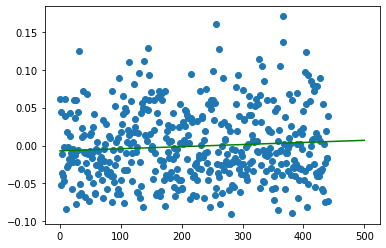

In [25]:
#Task5
plt.scatter(df['index'],df['bmi'])
x = np.linspace(0,500,80)
y = lr.predict(x)
plt.plot(x,y,color='green')
plt.show()
